In [15]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi Spark session
spark = SparkSession.builder.appName("Kematian Jawa Barat").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Mengonversi DataFrame PySpark menjadi Pandas DataFrame
pandas_df = df.toPandas()

# Menampilkan DataFrame
pandas_df


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kematian,penyebab_kematian,jumlah_kematian,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,CAMPAK,0,JIWA,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,DEMAM,0,JIWA,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,DIARE,0,JIWA,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,DIFTERI,0,JIWA,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,LAIN-LAIN,7,JIWA,2017
...,...,...,...,...,...,...,...,...,...,...
2101,2102,32,JAWA BARAT,3279,KOTA BANJAR,LAHIR MATI,BBLR,7,JIWA,2019
2102,2103,32,JAWA BARAT,3279,KOTA BANJAR,LAHIR MATI,KELAINAN,3,JIWA,2019
2103,2104,32,JAWA BARAT,3279,KOTA BANJAR,LAHIR MATI,LAIN-LAIN,3,JIWA,2019
2104,2105,32,JAWA BARAT,3279,KOTA BANJAR,LAHIR MATI,SEPSIS,0,JIWA,2019


In [24]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col

# Inisialisasi SparkSession
spark = SparkSession.builder.appName("Kematian Jawa Barat").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)


# Analisis tingkat kematian berdasarkan area
mortality_rates = df.groupBy("kode_provinsi", "nama_provinsi", "kode_kabupaten_kota", "nama_kabupaten_kota") \
                   .agg(sum("jumlah_kematian").alias("total_kematian")) \
                   .orderBy(col("total_kematian").desc())

# Konversi ke Pandas DataFrame
mortality_rates_pandas = mortality_rates.toPandas()

# Menampilkan hasil dengan format yang lebih baik
mortality_rates_pandas


,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,total_kematian
0,32,JAWA BARAT,3205,KABUPATEN GARUT,971
1,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,952
2,32,JAWA BARAT,3212,KABUPATEN INDRAMAYU,913
3,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,832
4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,764
5,32,JAWA BARAT,3215,KABUPATEN KARAWANG,660
6,32,JAWA BARAT,3209,KABUPATEN CIREBON,605
7,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,540
8,32,JAWA BARAT,3201,KABUPATEN BOGOR,522
9,32,JAWA BARAT,3211,KABUPATEN SUMEDANG,513


In [31]:
# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Menghitung jumlah kematian per jenis_kematian per tahun
jenis_kematian_per_tahun = df.groupBy("tahun", "jenis_kematian") \
                             .agg(sum("jumlah_kematian").alias("total_kematian")) \
                             .orderBy("tahun", "jenis_kematian")

# Menampilkan hasil
jenis_kematian_per_tahun.show()


+-----+-----------------+--------------+
|tahun|   jenis_kematian|total_kematian|
+-----+-----------------+--------------+
| 2017|  KEMATIAN BALITA|           239|
| 2017|     KEMATIAN IBU|           695|
| 2017|KEMATIAN POST-NEO|           489|
| 2017|       LAHIR MATI|          2770|
| 2018|  KEMATIAN BALITA|           212|
| 2018|     KEMATIAN IBU|           700|
| 2018|KEMATIAN POST-NEO|           504|
| 2018|       LAHIR MATI|          2591|
| 2019|  KEMATIAN BALITA|           208|
| 2019|     KEMATIAN IBU|           684|
| 2019|KEMATIAN POST-NEO|           496|
| 2019|       LAHIR MATI|          2355|
+-----+-----------------+--------------+



In [49]:
# Analisis penyebab kematian paling umum
most_common_causes = df.groupBy("penyebab_kematian").agg({"jumlah_kematian": "sum"}) \
                       .withColumnRenamed("sum(jumlah_kematian)", "total_kematian") \
                       .orderBy(col("total_kematian").desc())

most_common_causes.show()


+------------------+--------------+
| penyebab_kematian|total_kematian|
+------------------+--------------+
|         LAIN-LAIN|          3145|
|              BBLR|          3129|
|          ASFIKSIA|          2167|
|          KELAINAN|           879|
|        HIPERTENSI|           632|
|        PENDARAHAN|           602|
|         PNEUMONIA|           359|
|    GANGGUAN DARAH|           287|
|            SEPSIS|           249|
|             DIARE|           220|
|           INFEKSI|            87|
|     SALURAN CERNA|            59|
|             DEMAM|            56|
|GANGGUAN METABOLIK|            29|
|    KELAINAN SARAF|            20|
|           TETANUS|            15|
|           MALARIA|             5|
|            CAMPAK|             2|
|           DIFTERI|             1|
+------------------+--------------+



In [50]:
# Analisis tren kematian dari tahun ke tahun
death_trends = df.groupBy("tahun") \
                 .agg({"jumlah_kematian": "sum"}) \
                 .withColumnRenamed("sum(jumlah_kematian)", "total_kematian") \
                 .orderBy("tahun")

death_trends.show()


+-----+--------------+
|tahun|total_kematian|
+-----+--------------+
| 2017|          4193|
| 2018|          4007|
| 2019|          3743|
+-----+--------------+



In [56]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("AverageDeathByType").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Menghitung rata-rata jumlah kematian per jenis_kematian
rata_rata_kematian = df.groupBy("jenis_kematian") \
                       .agg(avg("jumlah_kematian").alias("rata_rata_kematian")) \
                       .orderBy("rata_rata_kematian", ascending=False)

# Menampilkan hasil
rata_rata_kematian.show()

# Stop Spark Session
spark.stop()


+-----------------+------------------+
|   jenis_kematian|rata_rata_kematian|
+-----------------+------------------+
|       LAHIR MATI|15.876543209876543|
|     KEMATIAN IBU| 4.277777777777778|
|KEMATIAN POST-NEO|2.6261022927689592|
|  KEMATIAN BALITA| 1.162257495590829|
+-----------------+------------------+



In [58]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("AverageDeathPerYear").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Menghitung rata-rata jumlah kematian per tahun
rata_rata_kematian_per_tahun = df.groupBy("tahun") \
                                .agg(avg("jumlah_kematian").alias("rata_rata_kematian")) \
                                .orderBy("tahun")

# Menampilkan hasil
rata_rata_kematian_per_tahun.show()

# Stop Spark Session
spark.stop()


+-----+------------------+
|tahun|rata_rata_kematian|
+-----+------------------+
| 2017| 5.972934472934473|
| 2018|5.7079772079772075|
| 2019| 5.331908831908832|
+-----+------------------+



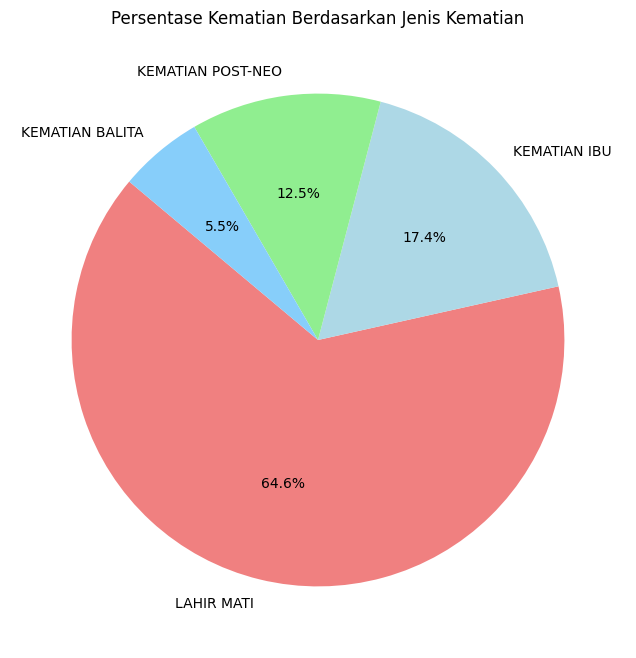

In [3]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import sum, col

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByTypeVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Menghitung total kematian per jenis kematian
total_kematian_per_jenis = df.groupBy("jenis_kematian") \
                             .agg(sum("jumlah_kematian").alias("total_kematian")) \
                             .orderBy("total_kematian", ascending=False)

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df = total_kematian_per_jenis.toPandas()

# Membuat grafik pie
plt.figure(figsize=(8, 8))
plt.pie(pandas_df["total_kematian"], labels=pandas_df["jenis_kematian"], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightskyblue'])
plt.title("Persentase Kematian Berdasarkan Jenis Kematian")

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()


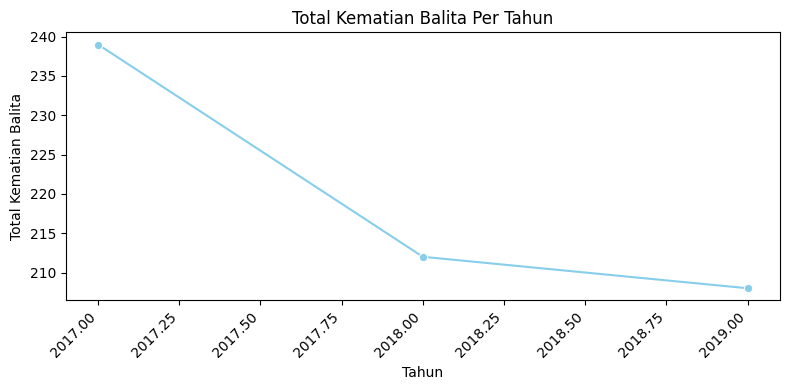

In [4]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, sum
import seaborn as sns

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByTypeBalitaPerYearVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Filter data hanya untuk jenis kematian "balita"
df_balita = df.filter(col("jenis_kematian") == "KEMATIAN BALITA")

# Menghitung total kematian balita per tahun
total_kematian_balita_per_tahun = df_balita.groupBy("tahun") \
                                            .agg(sum("jumlah_kematian").alias("total_kematian_balita")) \
                                            .orderBy("tahun")

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df_balita_per_tahun = total_kematian_balita_per_tahun.toPandas()

# Membuat grafik line
plt.figure(figsize=(8, 4))
sns.lineplot(x="tahun", y="total_kematian_balita", data=pandas_df_balita_per_tahun, marker='o', color='skyblue')
plt.title("Total Kematian Balita Per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Kematian Balita")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()


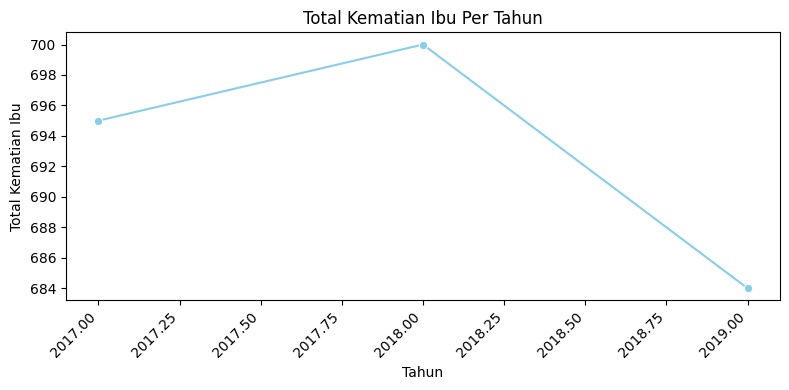

In [5]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, sum
import seaborn as sns

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByTypeIbuPerYearVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Filter data hanya untuk jenis kematian "ibu"
df_ibu = df.filter(col("jenis_kematian") == "KEMATIAN IBU")

# Menghitung total kematian ibu per tahun
total_kematian_ibu_per_tahun = df_ibu.groupBy("tahun") \
                                    .agg(sum("jumlah_kematian").alias("total_kematian_ibu")) \
                                    .orderBy("tahun")

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df_ibu_per_tahun = total_kematian_ibu_per_tahun.toPandas()

# Membuat grafik line
plt.figure(figsize=(8, 4))
sns.lineplot(x="tahun", y="total_kematian_ibu", data=pandas_df_ibu_per_tahun, marker='o', color='skyblue')
plt.title("Total Kematian Ibu Per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Kematian Ibu")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()


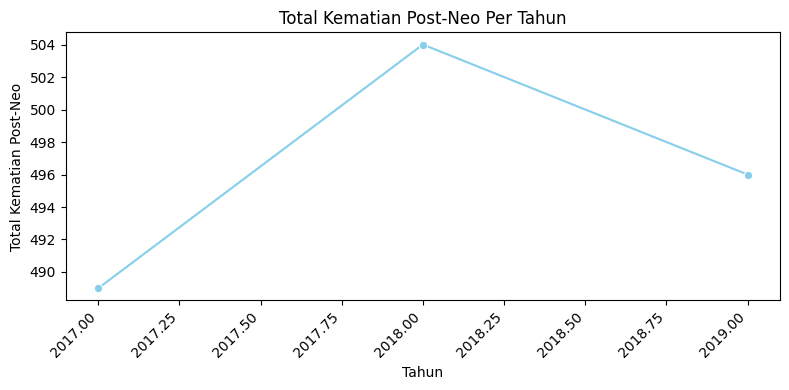

In [6]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, sum
import seaborn as sns

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByTypePostNeoPerYearVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Filter data hanya untuk jenis kematian "post-neo"
df_postneo = df.filter(col("jenis_kematian") == "KEMATIAN POST-NEO")

# Menghitung total kematian post-neo per tahun
total_kematian_postneo_per_tahun = df_postneo.groupBy("tahun") \
                                              .agg(sum("jumlah_kematian").alias("total_kematian_postneo")) \
                                              .orderBy("tahun")

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df_postneo_per_tahun = total_kematian_postneo_per_tahun.toPandas()

# Membuat grafik line
plt.figure(figsize=(8, 4))
sns.lineplot(x="tahun", y="total_kematian_postneo", data=pandas_df_postneo_per_tahun, marker='o', color='skyblue')
plt.title("Total Kematian Post-Neo Per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Kematian Post-Neo")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()


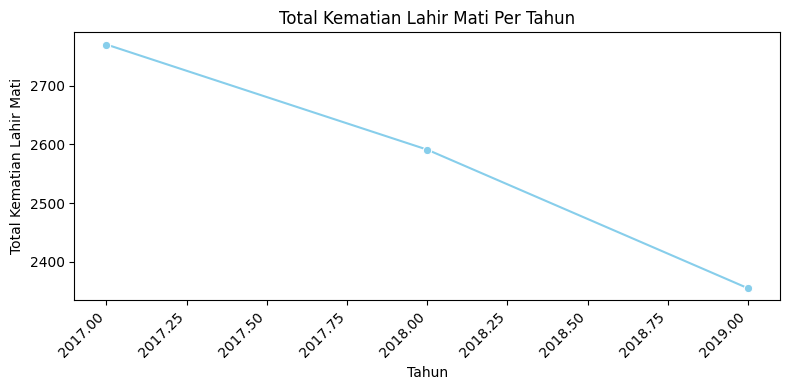

In [7]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, sum
import seaborn as sns

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByTypeLahirMatiPerYearVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Filter data hanya untuk jenis kematian "lahir mati"
df_lahirmati = df.filter(col("jenis_kematian") == "LAHIR MATI")

# Menghitung total kematian lahir mati per tahun
total_kematian_lahirmati_per_tahun = df_lahirmati.groupBy("tahun") \
                                                  .agg(sum("jumlah_kematian").alias("total_kematian_lahirmati")) \
                                                  .orderBy("tahun")

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df_lahirmati_per_tahun = total_kematian_lahirmati_per_tahun.toPandas()

# Membuat grafik line
plt.figure(figsize=(8, 4))
sns.lineplot(x="tahun", y="total_kematian_lahirmati", data=pandas_df_lahirmati_per_tahun, marker='o', color='skyblue')
plt.title("Total Kematian Lahir Mati Per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Kematian Lahir Mati")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()


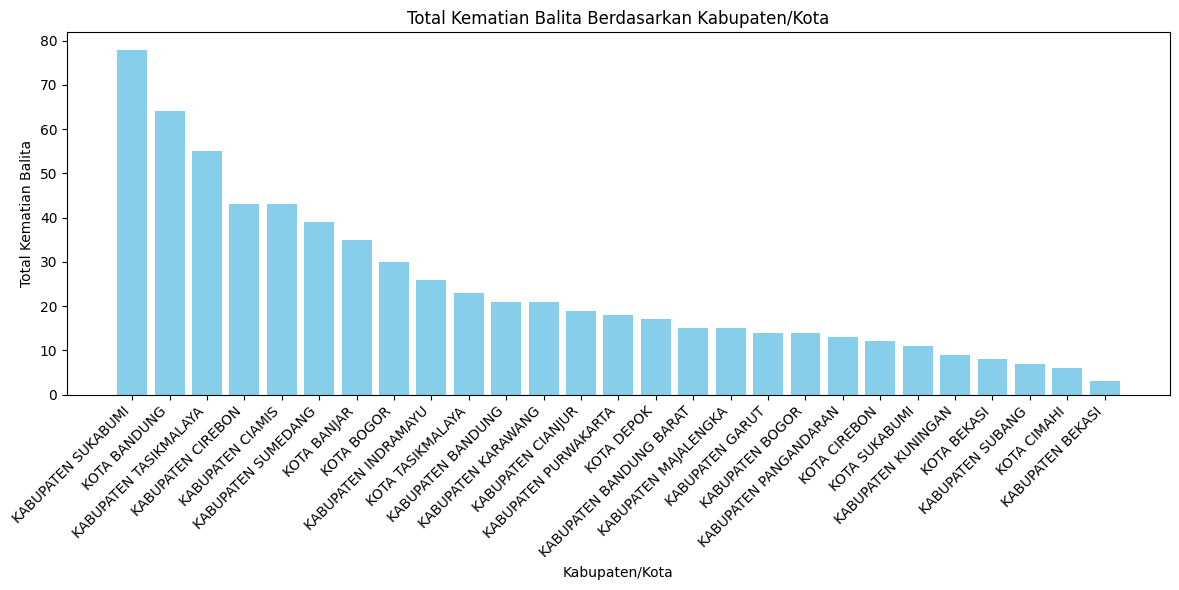

In [73]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByTypeBalitaVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Filter data hanya untuk jenis kematian "balita"
df_balita = df.filter(col("jenis_kematian") == "KEMATIAN BALITA")

# Menghitung total kematian balita per kabupaten/kota
total_kematian_balita_per_kabupaten = df_balita.groupBy("nama_kabupaten_kota") \
                                                .agg(sum("jumlah_kematian").alias("total_kematian_balita")) \
                                                .orderBy("total_kematian_balita", ascending=False)

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df_balita = total_kematian_balita_per_kabupaten.toPandas()

# Membuat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(pandas_df_balita["nama_kabupaten_kota"], pandas_df_balita["total_kematian_balita"], color='skyblue')
plt.title("Total Kematian Balita Berdasarkan Kabupaten/Kota")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Total Kematian Balita")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()


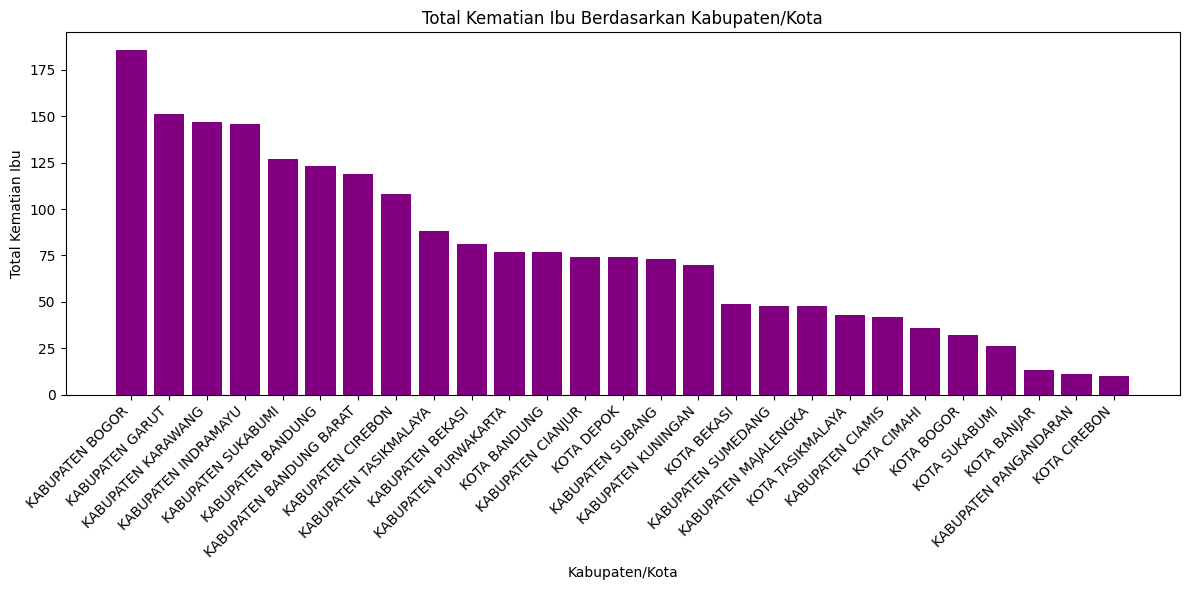

In [9]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, sum

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByTypeIbuVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Filter data hanya untuk jenis kematian "ibu"
df_ibu = df.filter(col("jenis_kematian") == "KEMATIAN IBU")

# Menghitung total kematian ibu per kabupaten/kota
total_kematian_ibu_per_kabupaten = df_ibu.groupBy("nama_kabupaten_kota") \
                                         .agg(sum("jumlah_kematian").alias("total_kematian_ibu")) \
                                         .orderBy("total_kematian_ibu", ascending=False)

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df_ibu = total_kematian_ibu_per_kabupaten.toPandas()

# Membuat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(pandas_df_ibu["nama_kabupaten_kota"], pandas_df_ibu["total_kematian_ibu"], color='purple')
plt.title("Total Kematian Ibu Berdasarkan Kabupaten/Kota")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Total Kematian Ibu")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()


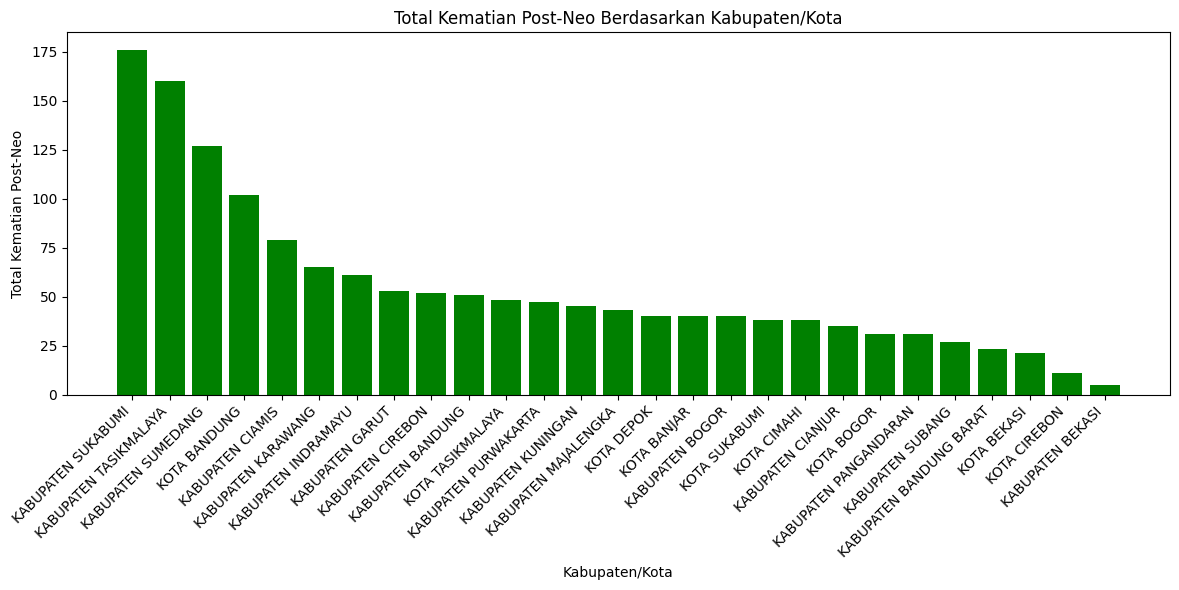

In [10]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, sum

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByTypePostNeoVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Filter data hanya untuk jenis kematian "post-neo"
df_postneo = df.filter(col("jenis_kematian") == "KEMATIAN POST-NEO")

# Menghitung total kematian post-neo per kabupaten/kota
total_kematian_postneo_per_kabupaten = df_postneo.groupBy("nama_kabupaten_kota") \
                                                  .agg(sum("jumlah_kematian").alias("total_kematian_postneo")) \
                                                  .orderBy("total_kematian_postneo", ascending=False)

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df_postneo = total_kematian_postneo_per_kabupaten.toPandas()

# Membuat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(pandas_df_postneo["nama_kabupaten_kota"], pandas_df_postneo["total_kematian_postneo"], color='green')
plt.title("Total Kematian Post-Neo Berdasarkan Kabupaten/Kota")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Total Kematian Post-Neo")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()


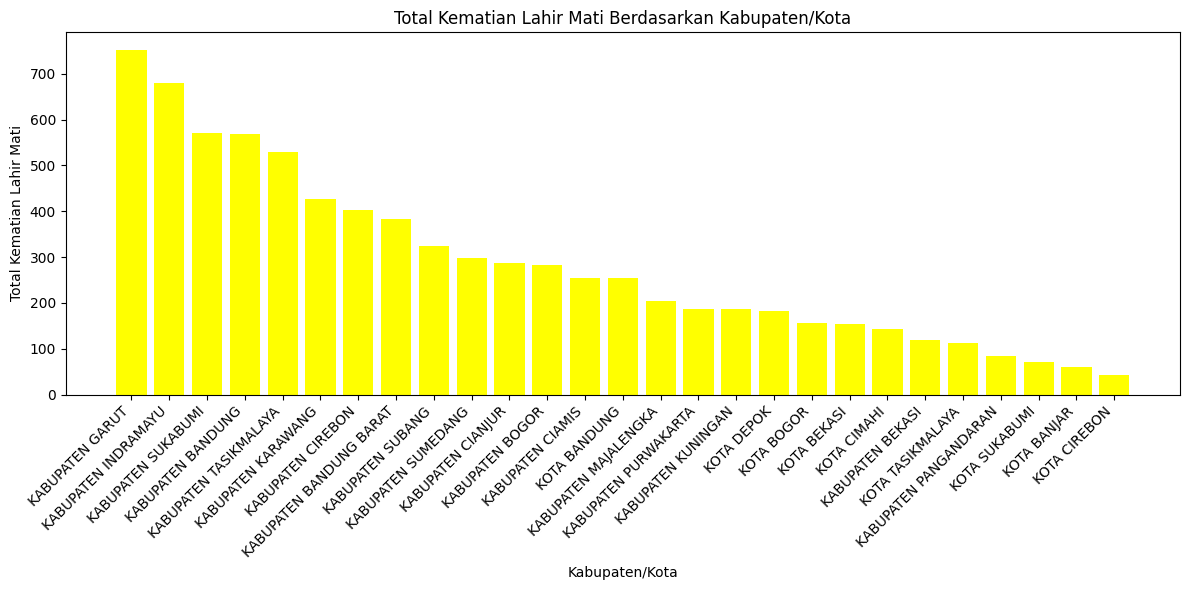

In [11]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, sum

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByTypeLahirMatiVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Filter data hanya untuk jenis kematian "lahir mati"
df_lahirmati = df.filter(col("jenis_kematian") == "LAHIR MATI")

# Menghitung total kematian lahir mati per kabupaten/kota
total_kematian_lahirmati_per_kabupaten = df_lahirmati.groupBy("nama_kabupaten_kota") \
                                                      .agg(sum("jumlah_kematian").alias("total_kematian_lahirmati")) \
                                                      .orderBy("total_kematian_lahirmati", ascending=False)

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df_lahirmati = total_kematian_lahirmati_per_kabupaten.toPandas()

# Membuat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(pandas_df_lahirmati["nama_kabupaten_kota"], pandas_df_lahirmati["total_kematian_lahirmati"], color='yellow')
plt.title("Total Kematian Lahir Mati Berdasarkan Kabupaten/Kota")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Total Kematian Lahir Mati")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()


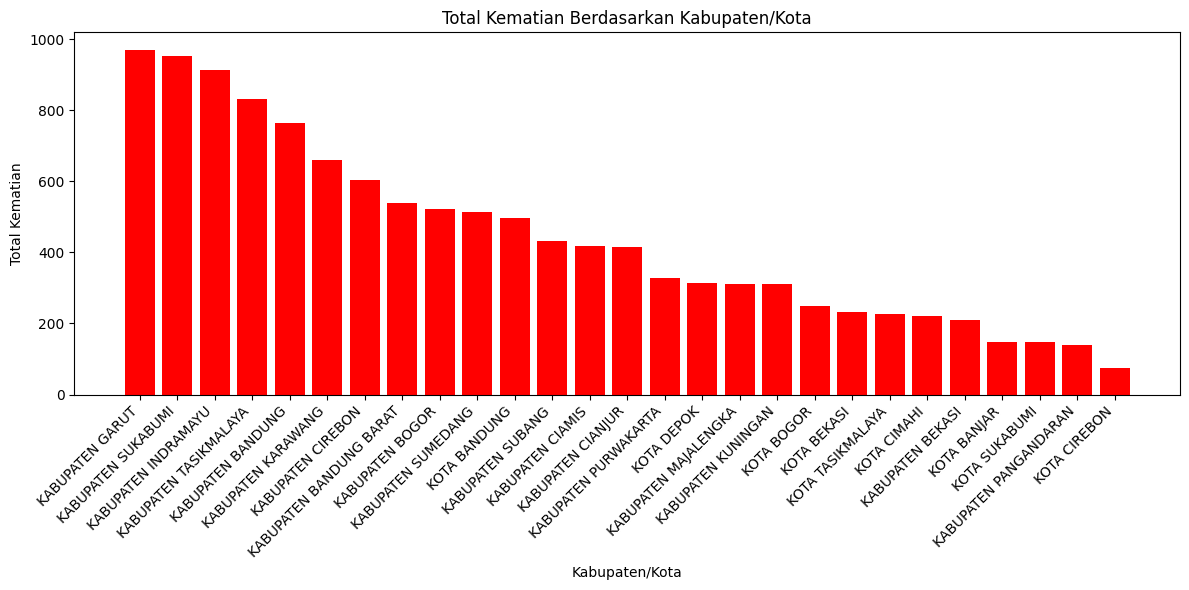

In [8]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, sum

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("DeathByDistrictVisualization").getOrCreate()

# Membaca dataset CSV
df = spark.read.csv("jml_kematian_jenis_penyebab_kematian_data.csv", header=True, inferSchema=True)

# Menghitung total kematian per kabupaten/kota
total_kematian_per_kabupaten = df.groupBy("nama_kabupaten_kota") \
                                 .agg(sum("jumlah_kematian").alias("total_kematian")) \
                                 .orderBy("total_kematian", ascending=False)

# Konversi DataFrame PySpark ke Pandas DataFrame
pandas_df = total_kematian_per_kabupaten.toPandas()

# Membuat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(pandas_df["nama_kabupaten_kota"], pandas_df["total_kematian"], color='red')
plt.title("Total Kematian Berdasarkan Kabupaten/Kota")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Total Kematian")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Stop Spark Session
spark.stop()
